In [0]:

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [6]:
print(tf.__version__)

1.14.0-rc1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

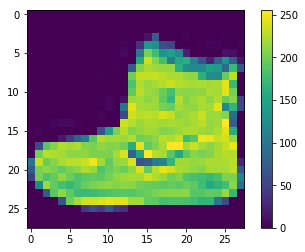

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

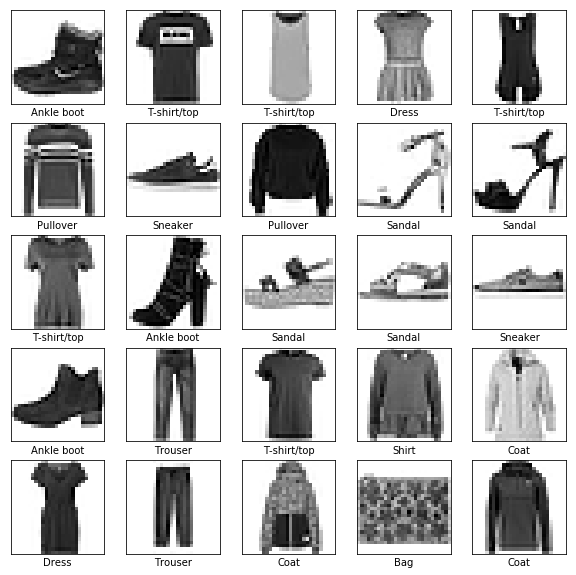

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0623 14:59:27.489808 139986481493888 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4928 - acc: 0.8272
Epoch 2/25
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3696 - acc: 0.8666
Epoch 3/25
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3357 - acc: 0.8784
Epoch 4/25
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3114 - acc: 0.8863
Epoch 5/25
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2921 - acc: 0.8922
Epoch 6/25
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2808 - acc: 0.8962
Epoch 7/25
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2670 - acc: 0.8999
Epoch 8/25
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2552 - acc: 0.9053
Epoch 9/25
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2464 - acc: 0.9087
Epoch 10/25
60000/60000 [==============================] - 4s 68us/sample - loss: 

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3737 - acc: 0.8915
Test accuracy: 0.8915


In [0]:
predictions = model.predict(test_images)

In [26]:
predictions[0]

array([1.1788058e-12, 1.6648105e-15, 4.0449708e-17, 1.0469147e-16,
       4.3540009e-15, 8.0285560e-08, 2.4001033e-12, 6.9560629e-05,
       2.4235211e-17, 9.9993038e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

In [29]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')




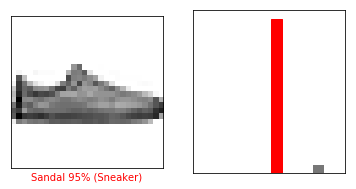

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

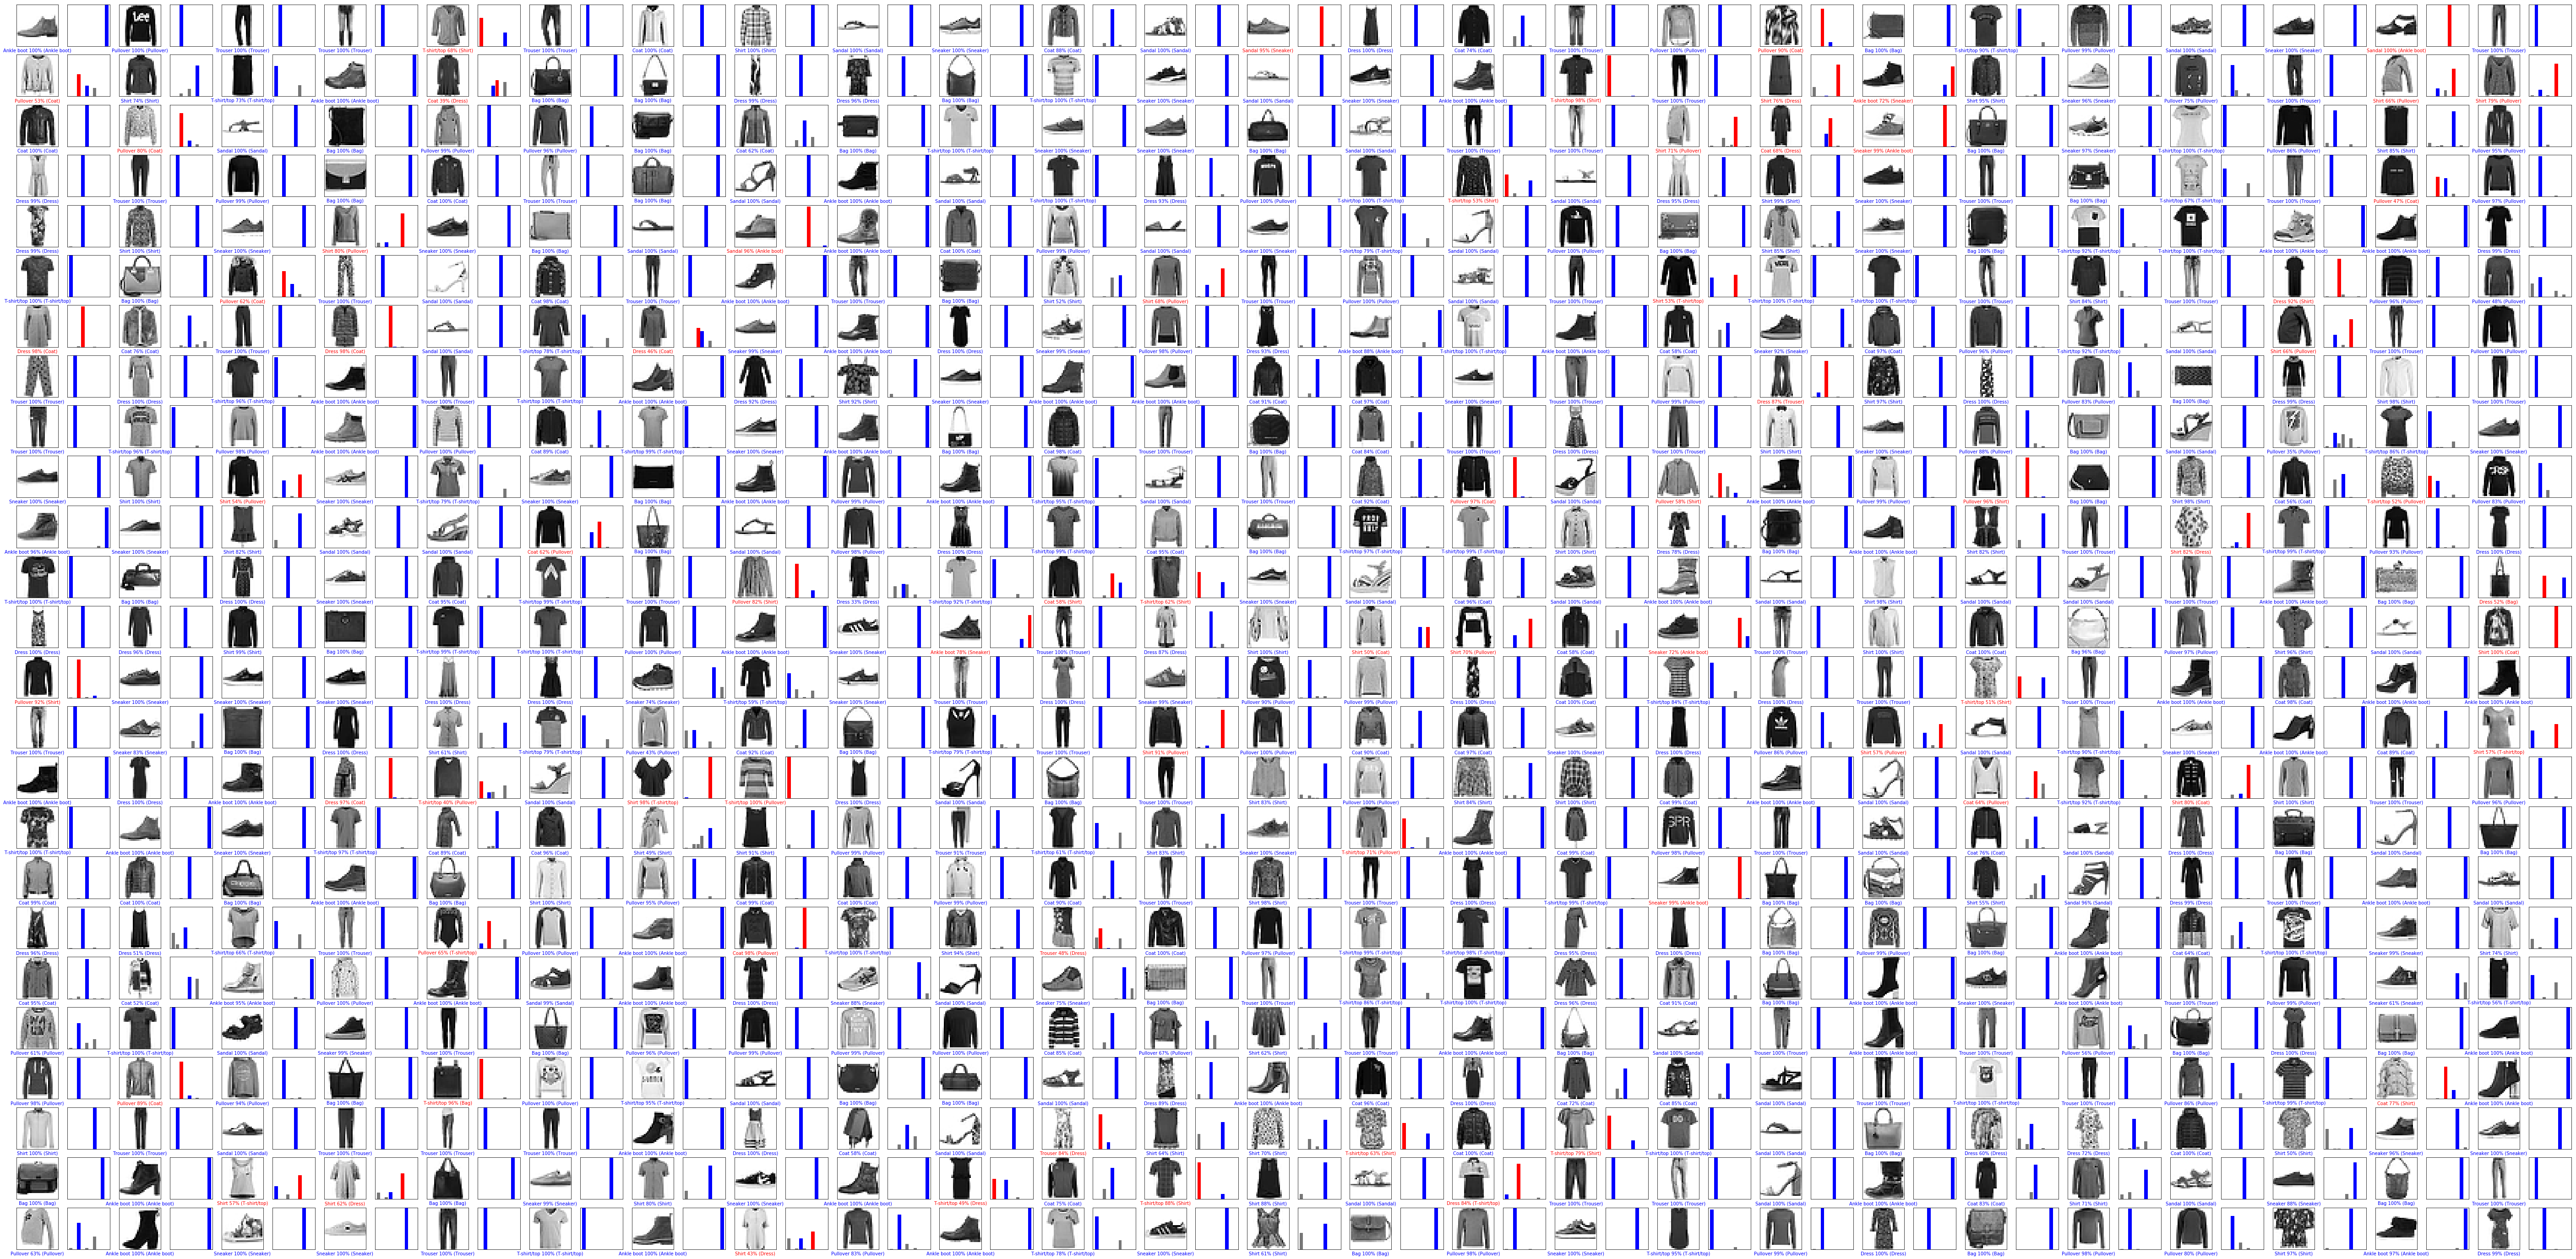

In [32]:
num_rows = 25
num_cols = 25
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()